In [1]:
import numpy as np
import tensorflow as tf
import gpflow
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift, ifftshift
import sys
sys.path.append('../../../')
import gpitch


gpitch.amtgp.init_settings()
plt.rcParams['figure.figsize'] = (18, 5)  # set plot size

In [2]:
def piano_kernel(x, Nc, variances, lengthscales, F0, B):
    k = np.zeros((x.shape))
    for n in range(Nc):
        k += variances[n] * np.exp(-np.abs(x) / lengthscales[n]) * np.cos(2.*np.pi*(n+1)*F0*np.sqrt(1. + B*(n+1)**2)*x)
    return k

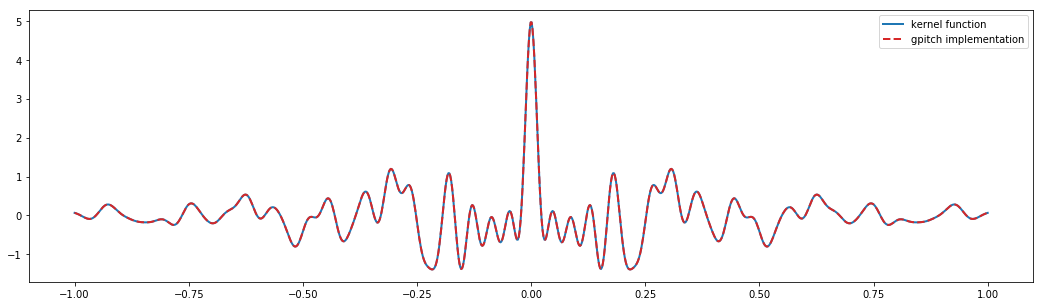

In [3]:
var = np.asarray([1., 1., 1., 1., 1.])
leng = np.asarray([.4, .4, .4, .3, .2])
f0 = 3.
beta = 0.05
N = 1000
x = np.linspace(-1., 1., N).reshape(-1, 1)

k_gpitch = gpitch.kernels.Inharmonic(input_dim=1, lengthscales=leng, variances=var, beta=beta, f0=f0)

kernel1 = piano_kernel(x, Nc=var.size, variances=var, lengthscales=leng, F0=f0, B=beta)
kernel2 = k_gpitch.compute_K(x, np.asarray(0.).reshape(-1,1))

plt.figure()
plt.plot(x, kernel1, lw=2)
plt.plot(x, kernel2, '--C3', lw=2)
plt.legend(['kernel function','gpitch implementation'])

We see that the kernel function implented here and the kernel implement in gpitch are the same!